In [138]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [140]:
train=pd.read_csv("/content/drive/MyDrive/ IndabaX Tanzania Mobile Banking Prediction Challenge by Tanzania IndabaX 2021/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/ IndabaX Tanzania Mobile Banking Prediction Challenge by Tanzania IndabaX 2021/Test.csv")
ss=pd.read_csv("/content/drive/MyDrive/ IndabaX Tanzania Mobile Banking Prediction Challenge by Tanzania IndabaX 2021/SampleSubmission.csv")


In [141]:
vd=pd.read_csv("/content/drive/MyDrive/ IndabaX Tanzania Mobile Banking Prediction Challenge by Tanzania IndabaX 2021/VariableDefinitions.csv")


In [142]:
pd.set_option("display.max_columns",70000)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",90000)
train.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [144]:
train.isnull().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64

In [145]:
test.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37
0,ID_000YI58E,39,2,22.0,2,NaN,NaN,2,NaN,1.0,NaN,1,2,2,2.0,2,2,2,1,2,2.0,2,2.0,2.0,NaN,1,1,NaN,2.0,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0
1,ID_001SP4JF,30,2,62.0,1,NaN,NaN,2,NaN,1.0,1.0,2,1,2,2.0,2,2,2,2,2,NaN,2,NaN,2.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,0
2,ID_001VOF6S,65,4,35.0,2,1.0,NaN,1,1.0,NaN,1.0,2,2,2,NaN,2,2,2,2,2,NaN,1,NaN,NaN,2.0,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
3,ID_0030LULG,123,0,24.0,2,1.0,NaN,2,NaN,1.0,1.0,1,2,2,2.0,2,1,2,2,2,NaN,2,1.0,2.0,2.0,2,2,NaN,2.0,NaN,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1
4,ID_0037PZ3R,67,2,25.0,2,NaN,NaN,1,NaN,NaN,2.0,2,1,2,NaN,2,2,2,1,1,NaN,3,NaN,2.0,2.0,1,2,2.0,NaN,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1


In [146]:
test.isnull().sum()

ID                  0
country_code        0
region              0
age               129
FQ1                 0
FQ2             25676
FQ3             26549
FQ4                 0
FQ5             37564
FQ6             20599
FQ7             20560
FQ8                 0
FQ9                 0
FQ10                0
FQ11            10565
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ17            41599
FQ18                0
FQ19            20357
FQ20            10456
FQ21            10500
FQ22                0
FQ23                0
FQ24            29912
FQ35            35425
FQ36            41577
FQ25                0
FQ26                0
FQ27            45034
FQ28            45846
FQ29            10601
FQ30            45601
FQ31            46113
FQ32            20477
FQ33                0
FQ34            13341
FQ37                0
dtype: int64

In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46477 entries, 0 to 46476
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            46477 non-null  object 
 1   country_code  46477 non-null  int64  
 2   region        46477 non-null  int64  
 3   age           46348 non-null  float64
 4   FQ1           46477 non-null  int64  
 5   FQ2           20801 non-null  float64
 6   FQ3           19928 non-null  float64
 7   FQ4           46477 non-null  int64  
 8   FQ5           8913 non-null   float64
 9   FQ6           25878 non-null  float64
 10  FQ7           25917 non-null  float64
 11  FQ8           46477 non-null  int64  
 12  FQ9           46477 non-null  int64  
 13  FQ10          46477 non-null  int64  
 14  FQ11          35912 non-null  float64
 15  FQ12          46477 non-null  int64  
 16  FQ13          46477 non-null  int64  
 17  FQ14          46477 non-null  int64  
 18  FQ15          46477 non-nu

In [148]:
train.shape,test.shape,ss.shape 

((108446, 42), (46477, 41), (46477, 2))

In [149]:
vd 

,ID,Person unique/random identification
0,country_code,The country codes
1,region,"Region_codes of a given country,.i.e., South A..."
2,age,Individual age
3,FQ1,Has ATM/debit card
4,FQ2,Is the ATM connected to an account with your n...
5,FQ3,Purchased with the ATM
6,FQ4,Has a credit card
7,FQ5,Used the credit card in 12 months
8,FQ6,Money deposits to a bank account in the last 1...
9,FQ7,Money withdrawals from a bank account in the l...


In [150]:
y=train['Target']
del train['Target']


In [151]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [152]:
train['splitter']="train"
test['splitter']="test"

In [153]:
data=pd.concat([train,test]).reset_index(drop=True)

In [154]:
data.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,splitter
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,train
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,train
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,train
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,train
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,train


In [155]:
data.isnull().sum()

ID                   0
country_code         0
region               0
age                451
FQ1                  0
FQ2              84998
FQ3              88777
FQ4                  0
FQ5             124825
FQ6              68386
FQ7              68386
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             35135
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17            138698
FQ18                 0
FQ19             67764
FQ20             35135
FQ21             35135
FQ22                 0
FQ23                 0
FQ24             99926
FQ35            117982
FQ36            138540
FQ25                 0
FQ26                 0
FQ27            150280
FQ28            152786
FQ29             35135
FQ30            151932
FQ31            153690
FQ32             68127
FQ33                 2
FQ34             45135
FQ37                 0
splitter             0
dtype: int64

In [156]:
col=['age',"FQ34","FQ33","FQ32","FQ31","FQ30","FQ29","FQ28","FQ27","FQ36","FQ35","FQ24","FQ21","FQ20","FQ19","FQ17","FQ11","FQ7","FQ6","FQ5","FQ3","FQ2","age"]

In [157]:
for x in col:
  data[x]=data[x].fillna(-1)

In [158]:
data.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,splitter
0,ID_000J8GTZ,1,6,35.0,2,-1.0,-1.0,2,-1.0,-1.0,1.0,2,1,1,2.0,2,2,2,2,2,-1.0,2,4.0,2.0,1.0,1,2,-1.0,1.0,-1.0,2,2,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0,train
1,ID_000QLXZM,32,7,70.0,2,-1.0,-1.0,2,-1.0,-1.0,1.0,2,2,2,2.0,2,2,2,2,2,-1.0,1,3.0,2.0,1.0,1,2,-1.0,-1.0,-1.0,1,1,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,1.0,2.0,0,train
2,ID_001728I2,71,7,22.0,2,1.0,-1.0,2,-1.0,-1.0,1.0,2,2,2,4.0,2,2,1,2,1,-1.0,1,-1.0,2.0,2.0,1,2,-1.0,-1.0,-1.0,2,1,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,2.0,1.0,1,train
3,ID_001R7IDN,48,3,27.0,1,-1.0,-1.0,2,-1.0,2.0,-1.0,2,1,1,2.0,2,2,2,2,2,-1.0,1,1.0,1.0,-1.0,1,2,-1.0,-1.0,-1.0,2,2,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0,1.0,1,train
4,ID_0029QKF8,25,0,79.0,2,-1.0,-1.0,2,-1.0,-1.0,-1.0,2,2,1,2.0,2,2,2,2,1,-1.0,1,-1.0,2.0,2.0,1,1,2.0,-1.0,1.0,2,2,-1.0,-1.0,2.0,-1.0,-1.0,2.0,1.0,1.0,1,train


In [159]:
data.isnull().sum()


ID              0
country_code    0
region          0
age             0
FQ1             0
FQ2             0
FQ3             0
FQ4             0
FQ5             0
FQ6             0
FQ7             0
FQ8             0
FQ9             0
FQ10            0
FQ11            0
FQ12            0
FQ13            0
FQ14            0
FQ15            0
FQ16            0
FQ17            0
FQ18            0
FQ19            0
FQ20            0
FQ21            0
FQ22            0
FQ23            0
FQ24            0
FQ35            0
FQ36            0
FQ25            0
FQ26            0
FQ27            0
FQ28            0
FQ29            0
FQ30            0
FQ31            0
FQ32            0
FQ33            0
FQ34            0
FQ37            0
splitter        0
dtype: int64

In [160]:
train=data[data['splitter']=="train"]
test=data[data['splitter']=="test"]


In [161]:
train.shape,test.shape 

((108446, 42), (46477, 42))

In [162]:
del train['ID']
del train['splitter']
del test['ID']
del test['splitter']

In [163]:
train.shape,test.shape 

((108446, 40), (46477, 40))

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,y,random_state=42,test_size=0.1)

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [166]:
x_train.shape 

(97601, 40)

In [167]:
import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout


In [168]:
model=Sequential() #initialize the instance of the model
#creating the first hidden layer
model.add(Dense(input_dim=40,kernel_initializer="he_uniform",activation="relu",units=20))
model.add(Dropout(0.3))
#creating the second hidden layer 
model.add(Dense(kernel_initializer="he_uniform",activation="relu",units=20))
model.add(Dropout(0.5))
#creating the third hidden layer
model.add(Dense(kernel_initializer="he_uniform",activation="relu",units=20))
model.add(Dropout(0.7))
#creating the output layer 
model.add(Dense(kernel_initializer="glorot_uniform",activation="sigmoid",units=1))


In [169]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [170]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [171]:
model_history=model.fit(x_train,y_train,validation_split=0.3,batch_size=30,epochs=10)

Epoch 1/10
2278/2278 [==============================] - 11s 4ms/step - loss: 0.6000 - accuracy: 0.7223 - val_loss: 0.5849 - val_accuracy: 0.7286
Epoch 2/10
2278/2278 [==============================] - 10s 4ms/step - loss: 0.5884 - accuracy: 0.7263 - val_loss: 0.5848 - val_accuracy: 0.7286
Epoch 3/10
2278/2278 [==============================] - 10s 4ms/step - loss: 0.5873 - accuracy: 0.7263 - val_loss: 0.5847 - val_accuracy: 0.7286
Epoch 4/10
2278/2278 [==============================] - 10s 4ms/step - loss: 0.5872 - accuracy: 0.7263 - val_loss: 0.5847 - val_accuracy: 0.7286
Epoch 5/10
2278/2278 [==============================] - 11s 5ms/step - loss: 0.5870 - accuracy: 0.7263 - val_loss: 0.5846 - val_accuracy: 0.7286
Epoch 6/10
2278/2278 [==============================] - 10s 4ms/step - loss: 0.5870 - accuracy: 0.7263 - val_loss: 0.5847 - val_accuracy: 0.7286
Epoch 7/10
2278/2278 [==============================] - 10s 4ms/step - loss: 0.5870 - accuracy: 0.7263 - val_loss: 0.5847 - val_ac

In [172]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [173]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

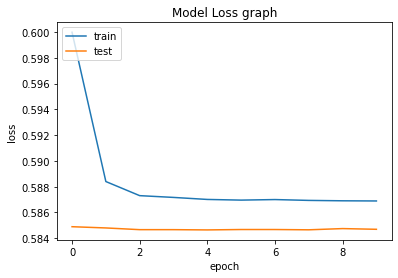

In [174]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss graph")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc="upper left")
plt.show()

In [175]:
'''
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Accuracy of the model")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc=['upper left'])
plt.show()

'''


'\nplt.plot(model_history.history[\'accuracy\'])\nplt.plot(model_history.history[\'val_accuracy\'])\nplt.title("Accuracy of the model")\nplt.ylabel("Accuracy")\nplt.xlabel("epoch")\nplt.legend([\'train\',\'test\'],loc=[\'upper left\'])\nplt.show()\n\n'

In [176]:
y_preds=model.predict(x_test)

In [178]:
#from sklearn.metrics import roc_auc_score
#score=score(y_preds,y_test)

In [179]:
score

0.5039559039707784

In [180]:
prediction=model.predict(test)

In [181]:
prediction=pd.DataFrame(prediction)
prediction.head()

,0
0,0.199721
1,0.062498
2,0.118456
3,0.071406
4,0.190643


In [182]:
ss.head()

,ID,Target
0,ID_000YI58E,NaN
1,ID_001SP4JF,NaN
2,ID_001VOF6S,NaN
3,ID_0030LULG,NaN
4,ID_0037PZ3R,NaN


In [183]:
ss['Target']=prediction

In [184]:
ss.to_csv("innocheck_deep_nerual_version2.csv",index=False)

In [185]:
ss.shape 

(46477, 2)